In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns

In [8]:
#Q1 Crime

crime=pd.read_csv('crime_data.csv')

In [9]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [14]:
# we perform clustering
#normalization
def norm_fun(i):
    
    X=(i-i.min())/(i.max()-i.min())
    return(X)

In [17]:
crime_norm=norm_fun(crime.iloc[:,1:])

In [18]:
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


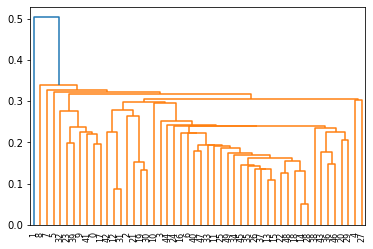

In [23]:
#create dendogram
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='single'))

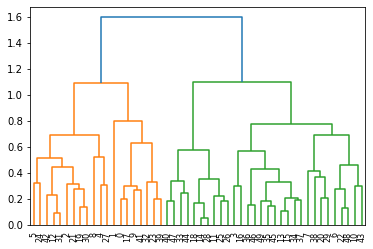

In [24]:

dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='complete'))

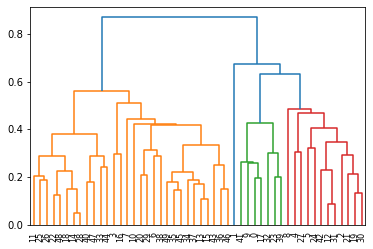

In [25]:
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='average'))

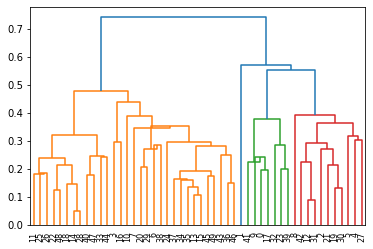

In [26]:
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='centroid'))

In [113]:
#create cluster s we have already discussed to choose the number of clusters 
#we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. 
#So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [114]:
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [115]:
Y_hc=hc.fit_predict(crime_norm)

In [116]:
Y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [117]:
cluster=pd.DataFrame(Y_hc,columns=['cluster'])

In [118]:
cluster

,cluster
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [119]:
crime['h_clusterid']=hc.labels_

In [120]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,3,0
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,3
5,Colorado,7.9,204,78,38.7,0,3
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,2,3
9,Georgia,17.4,211,60,25.8,0,0


In [121]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [122]:
X_hc=hc.fit_predict(crime_norm)

In [123]:
Cluster=pd.DataFrame(X_hc,columns=['Cluster'])

In [124]:
crime['clusterid']=hc.labels_

In [125]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,2
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,2,1
9,Georgia,17.4,211,60,25.8,0,3


In [48]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
Z_hc=hc.fit_predict(crime_norm)
cluster=pd.DataFrame(Z_hc,columns=['cluster'])
crime['clusterid']=hc.labels_
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,3,0
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,3
5,Colorado,7.9,204,78,38.7,0,3
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,2,3
9,Georgia,17.4,211,60,25.8,0,0


In [ ]:
#cluster 3 - south western states maxes out in three (Assault, Urbanpop, Rape) out of four crimes.
#cluster 4 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes
#Coincidentally, most of the southern region states belong to cluster 2 where Murders seems to be popular.
#The southern states in cluster 4 have more number of average arrests/ 100,000 persons in all the three crime categories than states 
#(half of mid-western states) in cluster 2 in spite of the average Urbanpop (%) being very close. For causality, 
#more variables are needed apart from the number of arrests to understand the inferences like the above.
 #For instance, it could be the density of people or number of people with a different 
#socio-economic statuses in that state.

In [112]:
# huge data no need to do hierarchical clustering(agglomerative clustering)
#we have to do KMeans clustering


Airline=pd.read_excel('data.xlsx')

In [97]:
Airline


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [98]:
Airline.shape

(3999, 12)

In [91]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [85]:
#normalization
def norm_fun(i):
    X=(i-i.min())/(i.max()-i.min())
    return(X)

In [99]:
Airline_norm=norm_fun(Airline.iloc[:,1:])

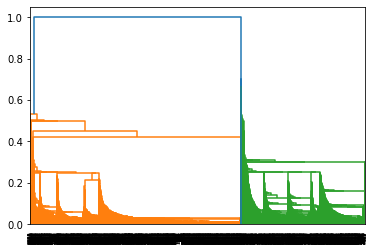

In [87]:
dendrogram=sch.dendrogram(sch.linkage(Airline_norm, method='single'))

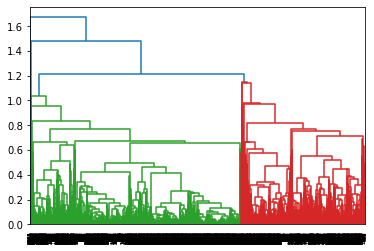

In [88]:
dendrogram=sch.dendrogram(sch.linkage(Airline_norm,method='average'))

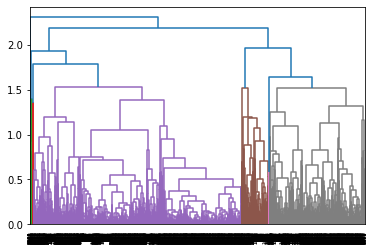

In [94]:
dendrogram=sch.dendrogram(sch.linkage(Airline_norm,method='complete'))

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(Airline_norm,method='centroid'))

In [95]:
#create cluster model
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')

In [100]:
y_hc=hc.fit_predict(Airline_norm)

In [101]:
Airline['clusterid']=hc.labels_

In [102]:
Airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2
